# Open loop QAM timing synchronization and phase error estimation.
For time domain modulation, the transimitter timing clock and rf clock are running independently. The crucial technique are timing synchronization and phase error tracking.
Due to our measurement scenario, we sampled the signal of QAM and do a one-time synchronization and measurement, so our algorithm have two limitation: open-loop and percision.

So I've learned serval algorithm of some close-loop and open-loop finnally I choose the O&M for timing estimation and use a cubic spline to resample, and a simple viterbi-viterbi method to estimate the phase error.

Those two methods both can work in open-loop, it means that then can process all samples at one time, don't need some extra samples to converge the loop.

I do a small demonstration to show how it work in QAM demodulation.


## 1. Signal generation

First, I generate some QAM signals, with order of 256, shaped with rolloff factor 0.35 span 10 symbols rooted raised cosine filter, with oversampled 64 times.
Then I downsample with a timing error to 4 samples per symbol. 
If we directly plot the received signal in constellation diagram:

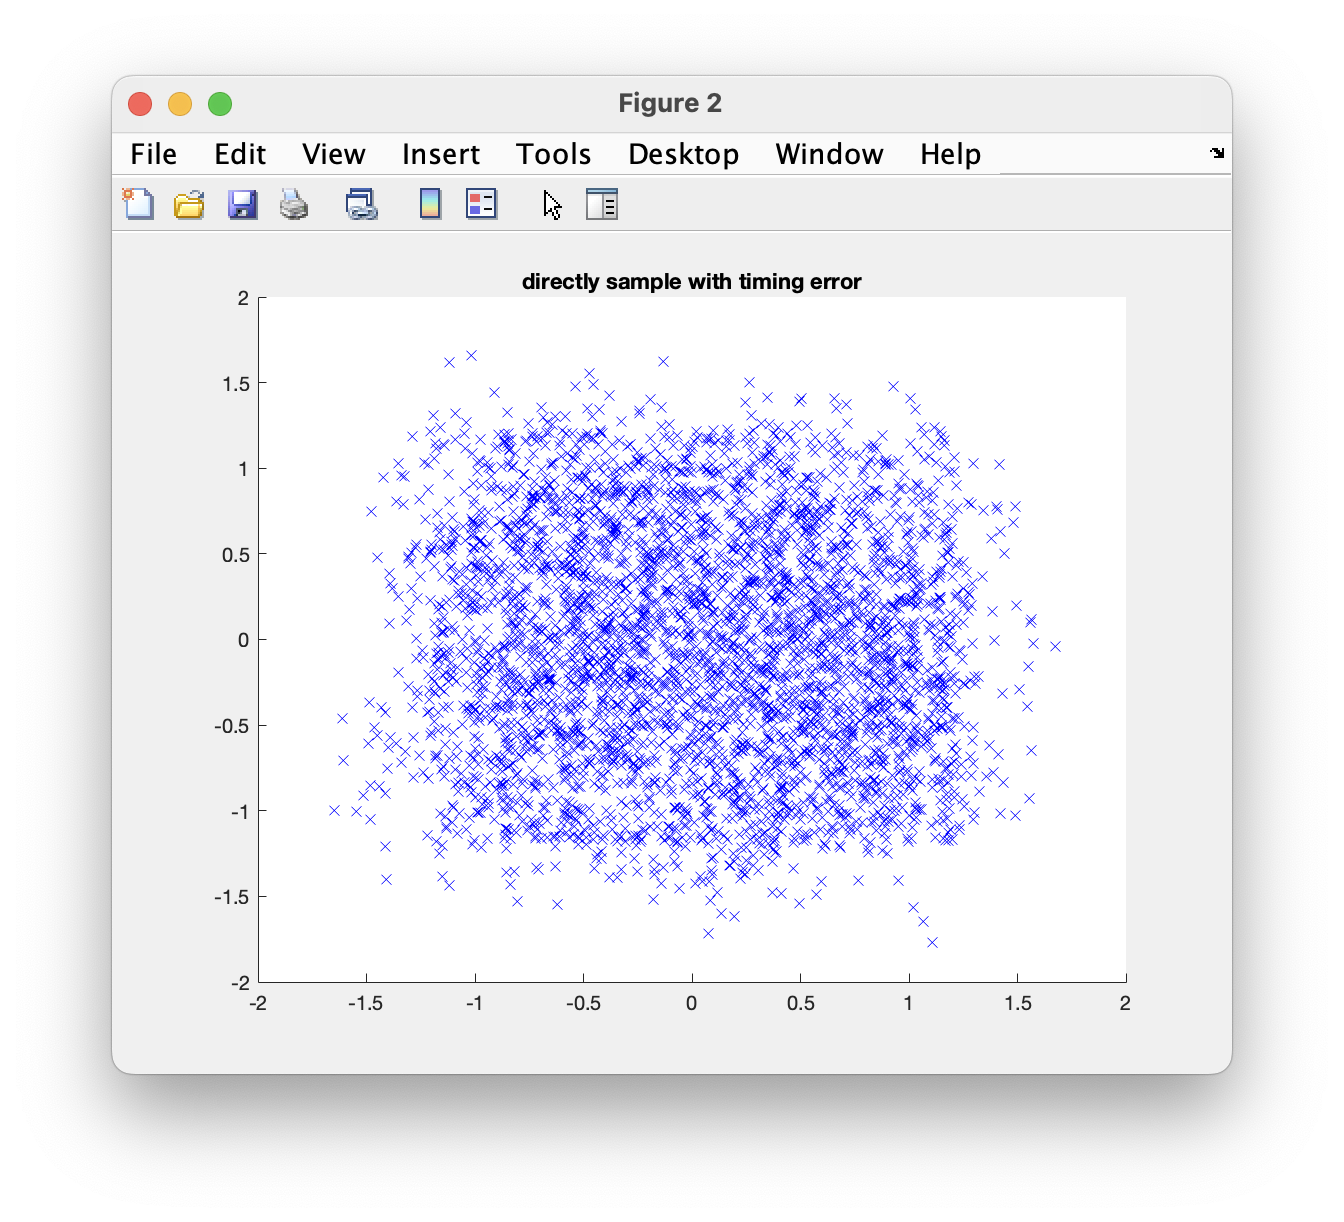

## 2. OERDER & MEYR timing estimation

I followed the thesis "Oerder, M.; Meyr, H. Digital Filter and Square Timing Recovery" to get the timing error from received signal. 
The main idea is the square magnitude of input signal is contain the frequency component of symbol clock of transimitter. So to illustrate that, I directly do a fft to show the frequency domain of squared signal.

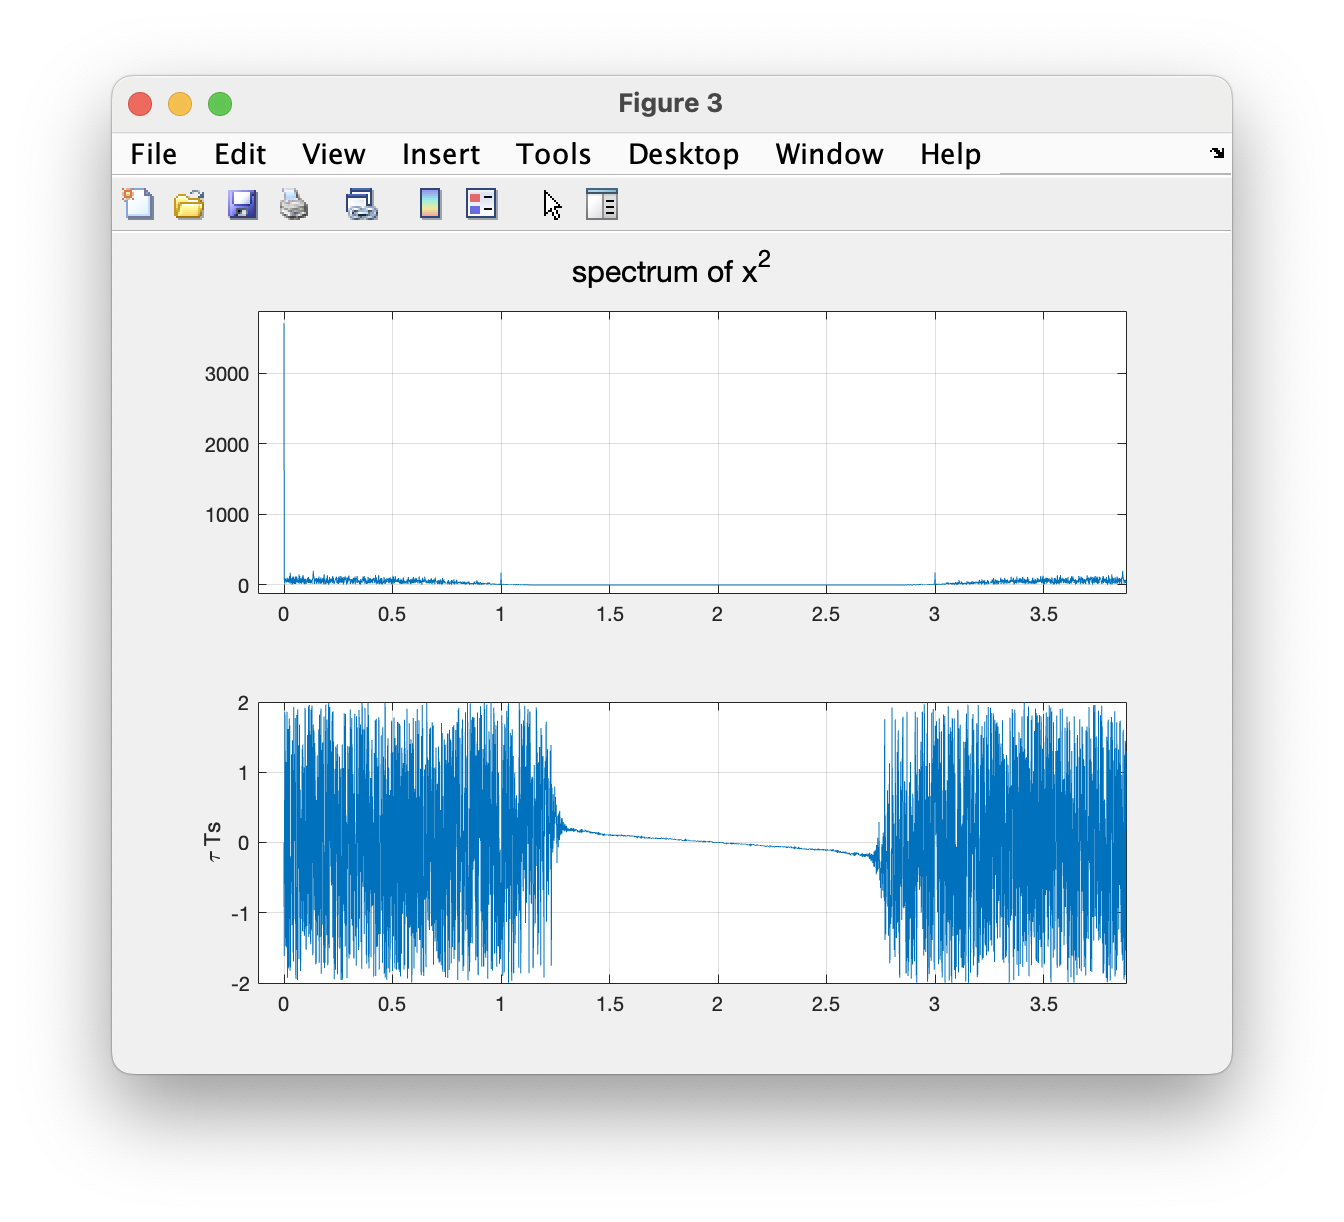

I normalized the frequency axis to sps (which I set to 4), the some component at the 1 is shown. Then if I calculate the angle of that component with 1/Tsym I will get the phase error of sample clock aka the timing error of symbol.

Finnally, at accordence with estimated timing error, use the cubic spline interpolation, I gain the best sample of symbol in time.

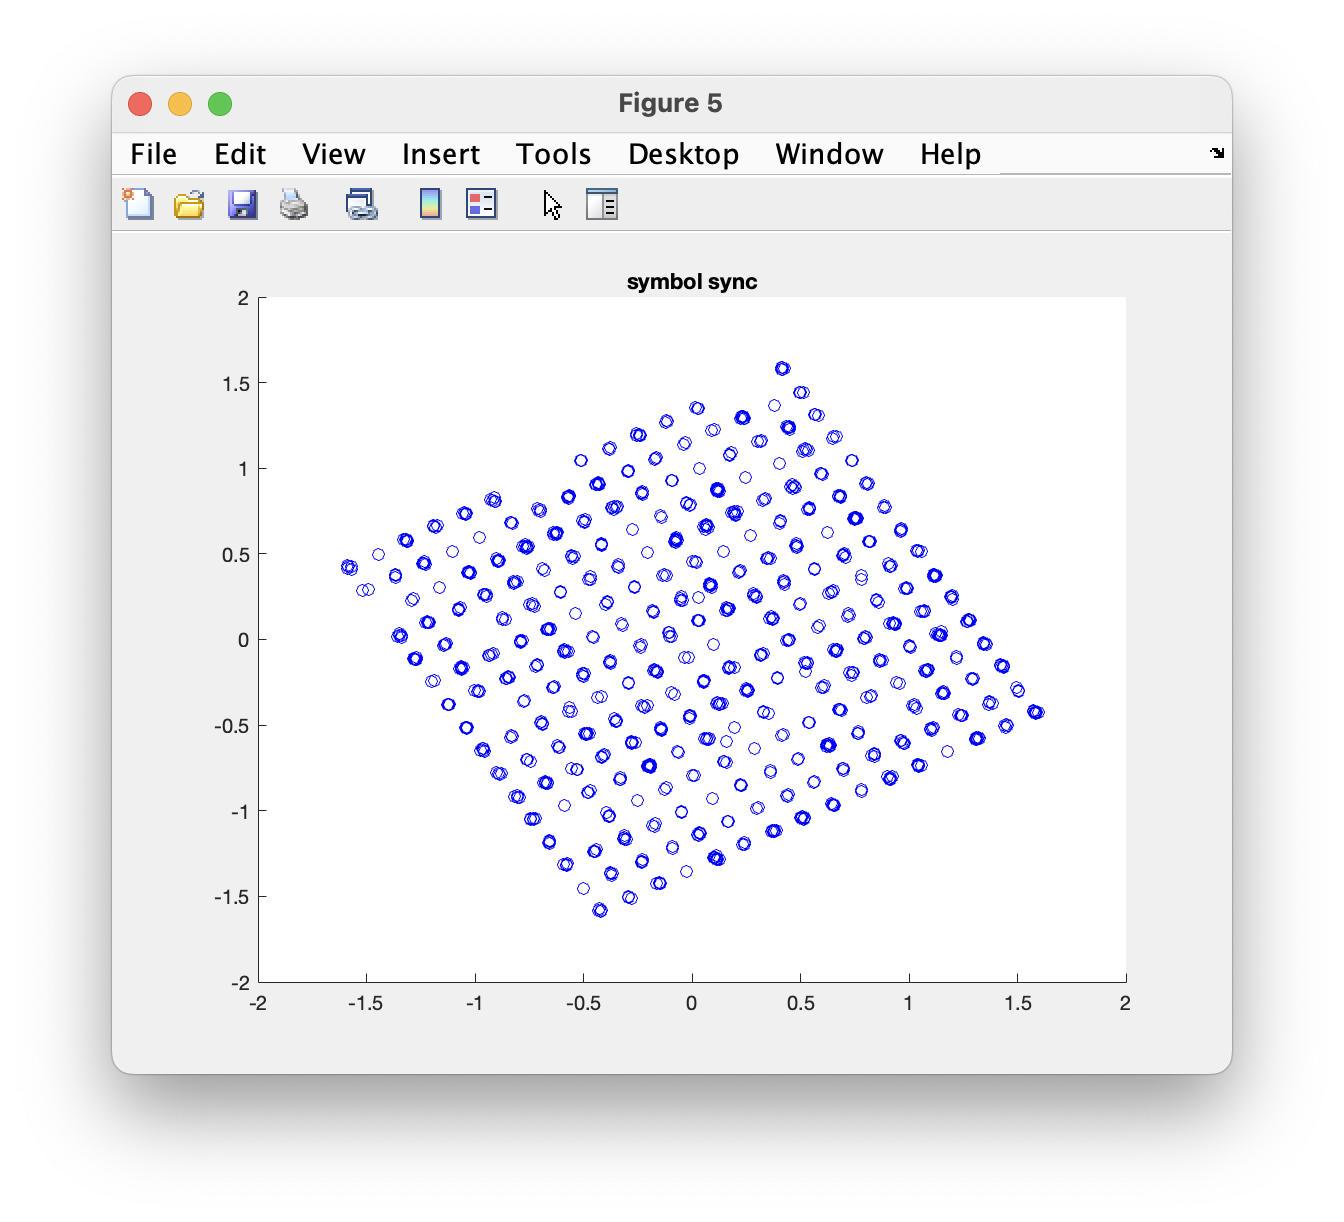

## 3. Viterbi-Viterbi phase error estimation

For the scenario of measurement, a reference signal of rf clock always be connected between the spectrum analyzer and the measured transimitter. So for the case I will ignore the frequency error of received signals only consider the phase error of local oscillator with cannot synchronized even if the reference signal connected.

The viterbi-viterbi method only measure the average phase of all samples, so an high order power of rx signal than the phase error derived from that result.

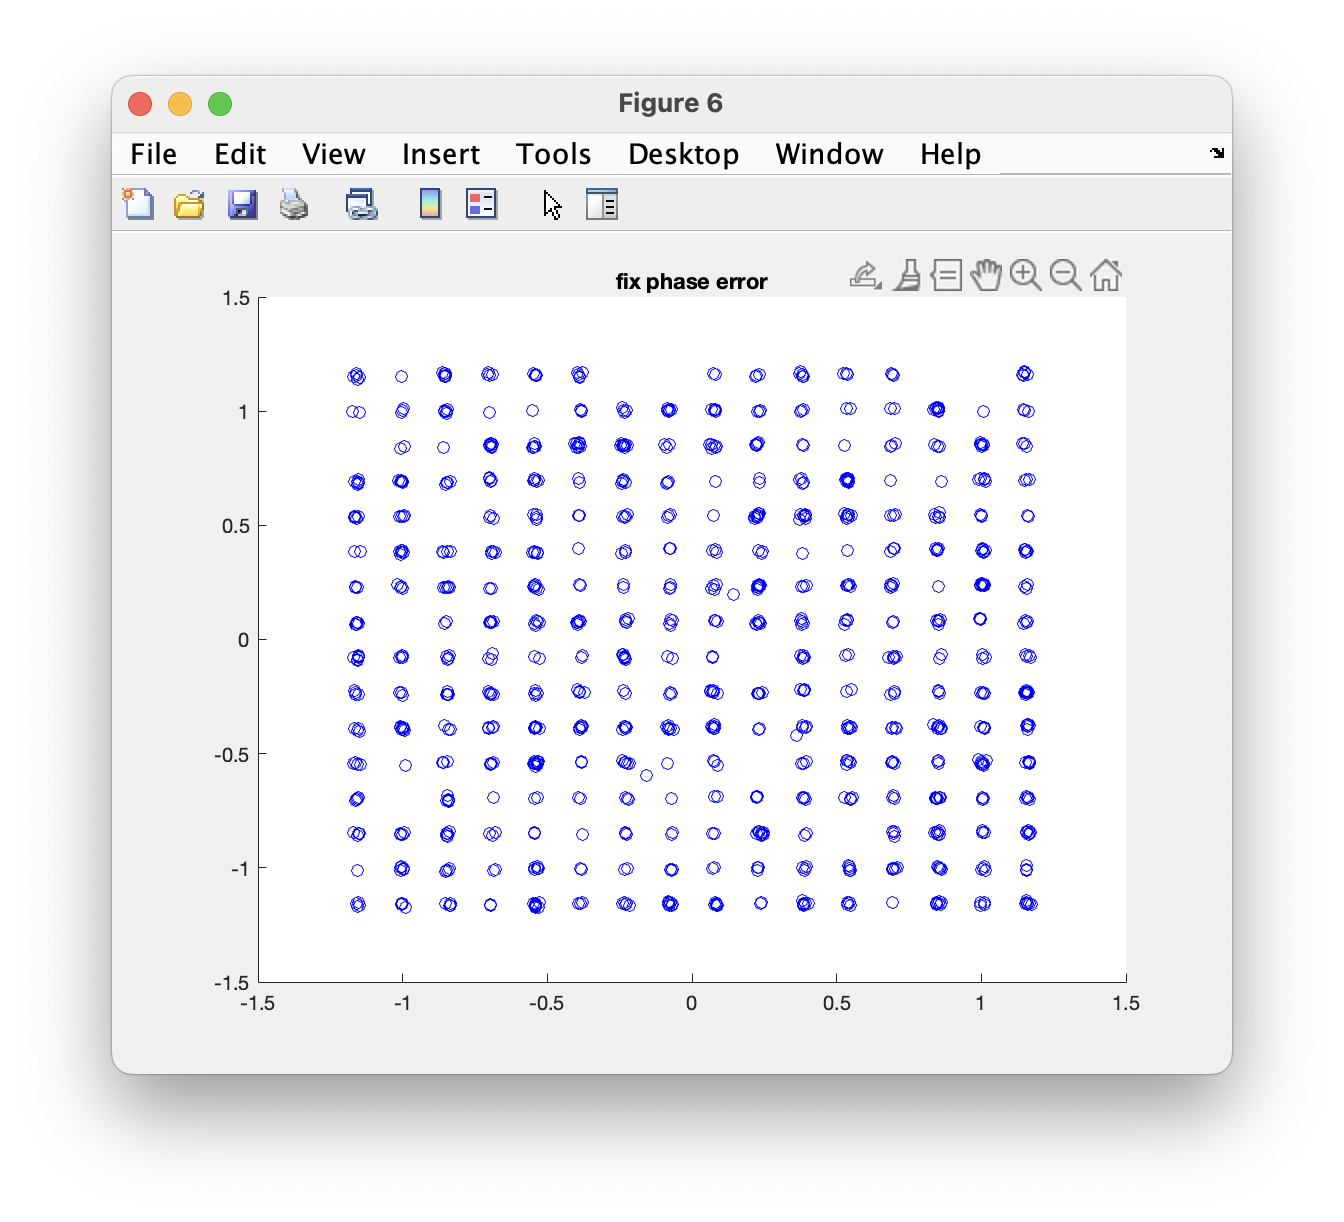

Actually, the VV method is statics way to get the phase error, but it seems easily to interfered by other sample which not in the diagnal of constellation. So we can consider the improved method metioned in the "X. Liu and J. -F. Bousquet, "Symbol Timing and Carrier Frequency Recovery Based on Entropy Minimization," in IEEE Access, vol. 6, pp. 53319-53329, 2018, doi: 10.1109/ACCESS.2018.2871358."